In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

# Garbage collector
import gc
gc.enable()


!pip3 install ipython-autotime
%load_ext autotime

In [2]:
kfold = []
for i in range(0,5):
  X_train = pd.read_csv("./cv_input/X_train_preprocessed_{}.csv".format(i + 1))
  y_train = pd.read_csv("./cv_input/y_train_{}.csv".format(i + 1))
  X_dev = pd.read_csv("./cv_input/X_dev_preprocessed_{}.csv".format(i + 1))
  y_dev = pd.read_csv("./cv_input/y_dev_{}.csv".format(i + 1))
  kfold.append({
      "X_train": X_train,
      "y_train": y_train['label'],
      "X_dev": X_dev,
      "y_dev": y_dev['label'],
  })


time: 34.4 s


['FIELD_3' 'stats_mean_FIELD_10_incomplete' 'stats_mean_FIELD_8_FIELD_55']
['FIELD_3' 'stats_mean_FIELD_8_FIELD_4']
['FIELD_3' 'stats_mean_FIELD_44_FIELD_4']
['FIELD_3' 'stats_mean_FIELD_8_FIELD_57' 'stats_mean_FIELD_10_incomplete'
 'stats_mean_FIELD_35_FIELD_57']
['FIELD_3' 'stats_mean_FIELD_8_FIELD_3']


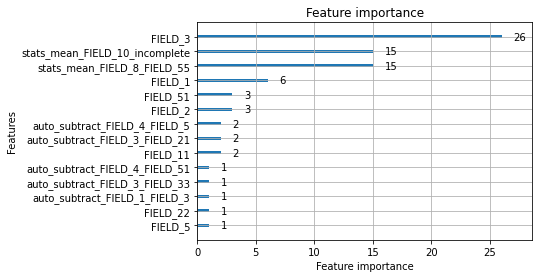

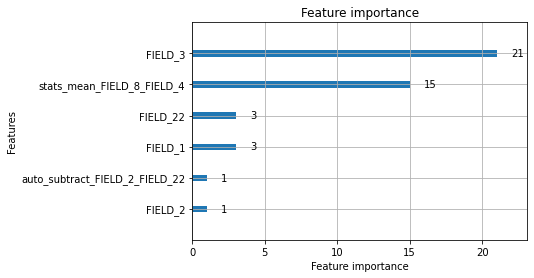

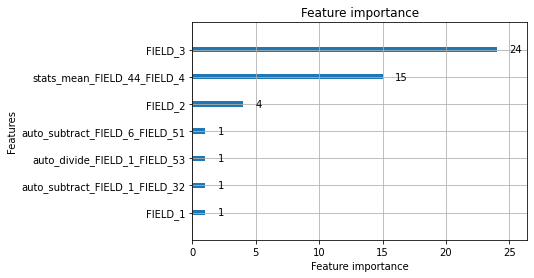

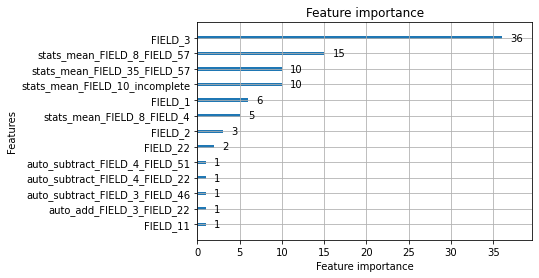

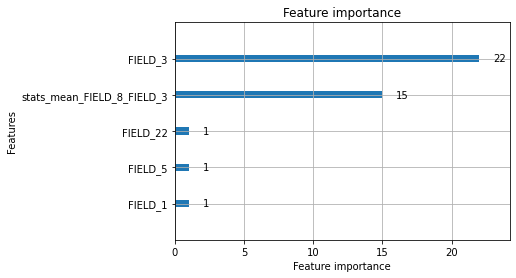

time: 20.4 s


In [3]:
# Combine train set and test set
from lightgbm import LGBMClassifier, plot_importance
lgm = LGBMClassifier(learning_rate=0.1,num_leaves=20,n_estimators=15,ranstdom_state=42)
dropped_list = []
for i in range(5):
    X_train, X_dev = kfold[i]['X_train'], kfold[i]['X_dev']
    X_train['is_train'] = 1
    X_dev['is_train'] = 0
    df_combine = pd.concat([X_train, X_dev], axis=0, ignore_index=True)
    y_combine = df_combine['is_train']
    X_combine = df_combine.drop(columns=['is_train'])
    a = lgm.fit(X_combine, y_combine)
    plot_importance(a)
    features_imp = pd.DataFrame(lgm.feature_importances_, columns=['feature_important'])
    features_imp = pd.concat([pd.DataFrame(X_train.columns, columns=['feature']), features_imp], axis=1)
    features_imp.sort_values(by=['feature_important'], inplace=True, ascending=False)
    features_imp.reset_index(drop=True, inplace=True)
    dropped_cols = features_imp[features_imp['feature_important'] >= 10]['feature'].values
    print(dropped_cols)
    dropped_list.extend(dropped_cols)
    
    del X_train, X_dev, df_combine, y_combine, features_imp, dropped_cols
    gc.collect()


In [4]:
dropped_list

['FIELD_3',
 'stats_mean_FIELD_10_incomplete',
 'stats_mean_FIELD_8_FIELD_55',
 'FIELD_3',
 'stats_mean_FIELD_8_FIELD_4',
 'FIELD_3',
 'stats_mean_FIELD_44_FIELD_4',
 'FIELD_3',
 'stats_mean_FIELD_8_FIELD_57',
 'stats_mean_FIELD_10_incomplete',
 'stats_mean_FIELD_35_FIELD_57',
 'FIELD_3',
 'stats_mean_FIELD_8_FIELD_3']

time: 2.27 ms
